In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [3]:
!cp -r /content/drive/MyDrive/tumor /content

In [4]:
X_train = []
y_train = []
image_size = 256
for i in labels:
    folderPath = os.path.join('/content/tumor','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/tumor','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 159.53it/s]


In [5]:
seed = 7

In [6]:
X_train, y_train = shuffle(X_train,y_train, random_state=seed)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=seed)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers


In [10]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 15.4 MB/s 


In [11]:
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D


In [12]:
# Model = Sequential()
# Model.add(ZeroPadding2D((1,1),input_shape=(256,256,3)))
# Model.add(Convolution2D(64, 3, 3, activation='relu'))
# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(64, 3, 3, activation='relu'))
# Model.add(MaxPooling2D((2,2), strides=(2,2)))

# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(128, 3, 3, activation='relu'))
# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(128, 3, 3, activation='relu'))
# Model.add(MaxPooling2D((2,2), strides=(2,2)))

# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(256, 3, 3, activation='relu'))
# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(256, 3, 3, activation='relu'))
# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(256, 3, 3, activation='relu'))
# Model.add(MaxPooling2D((2,2), strides=(2,2)))

# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(512, 3, 3, activation='relu'))
# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(512, 3, 3, activation='relu'))
# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(512, 3, 3, activation='relu'))
# Model.add(MaxPooling2D((2,2), strides=(2,2)))

# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(512, 3, 3, activation='relu'))
# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(512, 3, 3, activation='relu'))
# Model.add(ZeroPadding2D((1,1)))
# Model.add(Convolution2D(512, 3, 3, activation='relu'))
# Model.add(MaxPooling2D((2,2), strides=(2,2)))

# Model.add(Flatten())
# Model.add(Dense(4096, activation='relu'))
# Model.add(Dropout(0.5))
# Model.add(Dense(4096, activation='relu'))
# Model.add(Dropout(0.5))
# Model.add(Dense(1000, activation='softmax'))

In [13]:
Model = Sequential()
#
Model.add(Conv2D(filters = 64, kernel_size = (3,3), 
                 activation ='relu', input_shape = (256,256,3)))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

#
Model.add(Conv2D(filters = 128, kernel_size = (3,3), 
                 activation ='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

# 
Model.add(Flatten())
Model.add(Dense(256, activation = "relu"))
Model.add(Dropout(0.25))
Model.add(Dense(4, activation = "softmax"))

In [14]:
Model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [15]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2,mode="min")

In [16]:
# ANN_Model = Model.fit(X_train,
#                       validation_data=y_train,
#                       epochs=50,
#                       batch_size=20,
#                       callbacks=Call_Back)
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=2,mode="min")
ANN_Model = Model.fit(X_train,y_train,
                      epochs=50,
                      batch_size=20,
                      callbacks=Call_Back)

Epoch 1/50
147/147 [==============================] - 16s 46ms/step - loss: 10.0741 - accuracy: 0.4549
Epoch 2/50
147/147 [==============================] - 6s 43ms/step - loss: 0.9601 - accuracy: 0.5907
Epoch 3/50
147/147 [==============================] - 6s 42ms/step - loss: 0.7796 - accuracy: 0.6772
Epoch 4/50
147/147 [==============================] - 6s 43ms/step - loss: 0.6676 - accuracy: 0.7337
Epoch 5/50
147/147 [==============================] - 6s 43ms/step - loss: 0.5576 - accuracy: 0.7896
Epoch 6/50
147/147 [==============================] - 6s 43ms/step - loss: 0.4780 - accuracy: 0.8175
Epoch 7/50
147/147 [==============================] - 6s 43ms/step - loss: 0.4352 - accuracy: 0.8390
Epoch 8/50
147/147 [==============================] - 6s 43ms/step - loss: 0.3846 - accuracy: 0.8560
Epoch 9/50
147/147 [==============================] - 6s 43ms/step - loss: 0.3441 - accuracy: 0.8679
Epoch 10/50
147/147 [==============================] - 6s 43ms/step - loss: 0.2711 - accu

In [17]:
pred = Model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [18]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        86
           1       0.92      0.86      0.89        56
           2       0.84      0.90      0.87        88
           3       0.97      0.99      0.98        97

    accuracy                           0.90       327
   macro avg       0.90      0.90      0.90       327
weighted avg       0.90      0.90      0.90       327



In [19]:
def img_pred(upload):
    for name, file_info in uploader.value.items():
      img = Image.open(io.BytesIO(file_info['content']))
    opencvImage = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img = cv2.resize(opencvImage,(256,256))
    img = img.reshape(1,256,256,3)
    p = Model.predict(img)
    p = np.argmax(p,axis=1)[0]

    if p==0:
        p='Glioma Tumor'
    elif p==1:
        print('The model predicts that there is no tumor')
    elif p==2:
        p='Meningioma Tumor'
    else:
        p='Pituitary Tumor'

    if p!=1:
        print(f'The Model predicts that it is a {p}')

In [20]:
uploader = widgets.FileUpload()
display(uploader)

FileUpload(value={}, description='Upload')

In [21]:
button = widgets.Button(description='Predict')
out = widgets.Output()
def on_button_clicked(_):
    with out:
        clear_output()
        try:
            img_pred(uploader)
            
        except:
            print('No Image Uploaded/Invalid Image File')
button.on_click(on_button_clicked)
widgets.VBox([button,out])

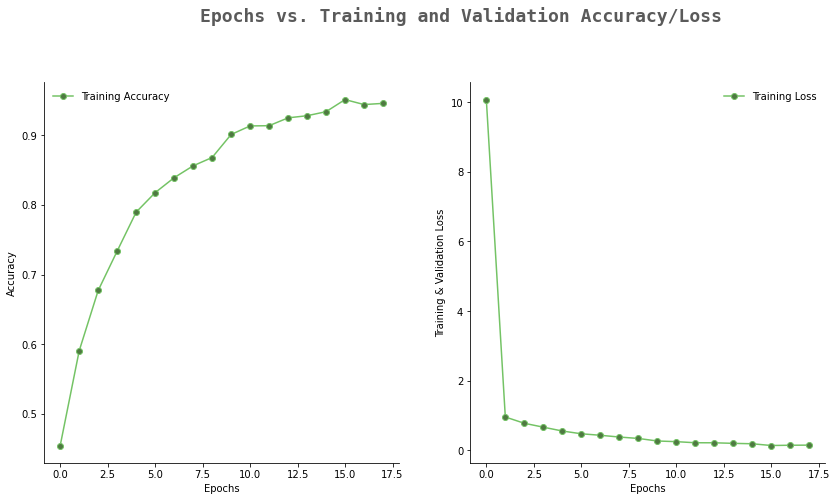

In [23]:
filterwarnings('ignore')

epochs = [i for i in range(18)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = ANN_Model.history['accuracy']
train_loss = ANN_Model.history['loss']
# val_acc = ANN_Model.history['val_accuracy']
# val_loss = ANN_Model.history['val_loss']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
# ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
#            label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
# ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
#            label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

In [34]:
Model.save_weights('model_v1.h5', save_format='h5')

In [35]:
from tensorflow import keras
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [36]:
history = Model.fit(X_train,y_train,
                      epochs=50,
                      batch_size=20,
                      callbacks=Call_Back)

Epoch 1/50
147/147 [==============================] - 6s 43ms/step - loss: 0.1479 - accuracy: 0.9540
Epoch 2/50
147/147 [==============================] - 6s 43ms/step - loss: 0.1117 - accuracy: 0.9591
Epoch 3/50
147/147 [==============================] - 6s 43ms/step - loss: 0.0805 - accuracy: 0.9745
Epoch 4/50
147/147 [==============================] - 6s 43ms/step - loss: 0.1261 - accuracy: 0.9598
Epoch 5/50
147/147 [==============================] - 6s 43ms/step - loss: 0.1322 - accuracy: 0.9571


In [37]:
!cp -r /content/model_v1.h5 /content/drive/MyDrive/tumor